# Pratik kadam 
NLP Project on Sentiment Analysis 


#### Importing Libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings("ignore")

#### Importing Dataset

In [2]:
data = pd.read_csv(r"D:\PROJECTS\NLP Sentiment analysis(Flipcart)\flipkart_review_data_2022_02.csv")
data.head(3)

,Unnamed: 0,ProductUrl,productTitle,productPrice,averageRating,reviewTitle,reviewDescription,reviewAuthor,reviewAt,reviewLikes,reviewDislikes,certifiedBuyer,reviewerLocation,scrapedAt,uniqId
0,0,https://www.flipkart.com/lg-108-cm-43-inch-ult...,LG 108 cm (43 inch) Ultra HD (4K) LED Smart TV,"₹36,499",4.4,Excellent,Very good product,palakollu komali,6 months ago,0,1,True,Tenali,20/02/2022 02:03:42,4e9df8d3-736c-5dae-b867-b92b7f09fc84
1,1,https://www.flipkart.com/lg-108-cm-43-inch-ult...,LG 108 cm (43 inch) Ultra HD (4K) LED Smart TV,"₹36,499",4.4,Really Nice,Nice and super picture quality.and sound also ...,Yogesh Virkar,3 months ago,0,0,True,Mumbai,20/02/2022 02:03:42,7ba04258-9f05-5642-ba33-8982db1f6c5e
2,2,https://www.flipkart.com/lg-108-cm-43-inch-ult...,LG 108 cm (43 inch) Ultra HD (4K) LED Smart TV,"₹36,499",4.4,Super!,This is excellent picture qualityUltimate soun...,Sudhir Kumar Chaudhary,3 months ago,0,0,True,Haridwar,20/02/2022 02:03:42,bfb20e97-eacf-5b76-a5eb-91999d6bd7a3


In [3]:
data.columns

Index(['Unnamed: 0', 'ProductUrl', 'productTitle', 'productPrice',
       'averageRating', 'reviewTitle', 'reviewDescription', 'reviewAuthor',
       'reviewAt', 'reviewLikes', 'reviewDislikes', 'certifiedBuyer',
       'reviewerLocation', 'scrapedAt', 'uniqId'],
      dtype='object')

In [4]:
data.shape

(343, 15)

* Rows = 343
* Columns = 15

In [5]:
data.isna().sum()

Unnamed: 0           0
ProductUrl           0
productTitle         0
productPrice         0
averageRating        0
reviewTitle          0
reviewDescription    0
reviewAuthor         0
reviewAt             0
reviewLikes          0
reviewDislikes       0
certifiedBuyer       0
reviewerLocation     0
scrapedAt            0
uniqId               0
dtype: int64

<Axes: >

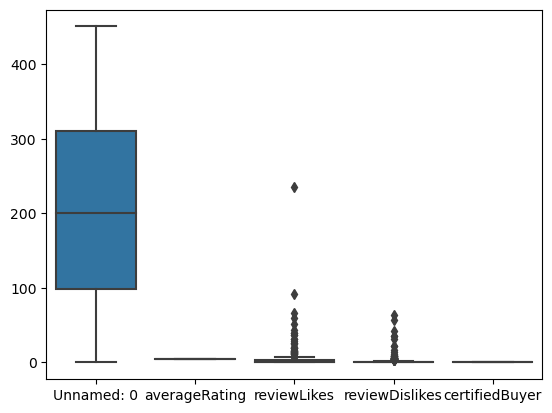

In [6]:
sns.boxplot(data=data)

In [7]:
data.columns

Index(['Unnamed: 0', 'ProductUrl', 'productTitle', 'productPrice',
       'averageRating', 'reviewTitle', 'reviewDescription', 'reviewAuthor',
       'reviewAt', 'reviewLikes', 'reviewDislikes', 'certifiedBuyer',
       'reviewerLocation', 'scrapedAt', 'uniqId'],
      dtype='object')

In [8]:
products = data['productTitle'].nunique()
products

3

* Here we have three Products

In [9]:
df = pd.DataFrame(data.reviewDescription) #taking only reviewDescription column for sentiment analysis
df.head()

,reviewDescription
0,Very good product
1,Nice and super picture quality.and sound also ...
2,This is excellent picture qualityUltimate soun...
3,Nice
4,Don't go with the negative reviews. Just go fo...


### Data cleaning

### Steps :
1) Lower Case
2) Removing URL
3) Removing Punctuations
4) Removing Numbers
5) Removing Stopwords
6) Lemmitization
7) Removing Extra white space

### Converting in Lower case

In [10]:
df.text = df.reviewDescription.str.lower()
df.iloc[1,0]

'Nice and super picture quality.and sound also very good.but only one disappointed viewing angal not so good.'

### Removing URl

In [11]:
df.reviewDescription = df.reviewDescription.str.replace(r'http\S+|www.\S+','',case=False)  # | = or 
df.iloc[1,0]

'Nice and super picture quality.and sound also very good.but only one disappointed viewing angal not so good.'

### Removing Punctuation

In [12]:
import string
string.punctuation

def remove_punctuation(abc):
    text_nopunt="".join([c  
                         for c in abc  
                         if c not in string.punctuation])
    return text_nopunt

In [13]:
df.reviewDescription = df.reviewDescription.apply(lambda x : remove_punctuation(x))  # x = Text 
df.iloc[1,0]

'Nice and super picture qualityand sound also very goodbut only one disappointed viewing angal not so good'

### Removing Numbers 

In [14]:
df['reviewDescription'] = df['reviewDescription'].str.replace('\d+','')  # data.text  or data['text']
df.iloc[1,0]

'Nice and super picture qualityand sound also very goodbut only one disappointed viewing angal not so good'

### Removing stopwords 

In [15]:
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [16]:
df['reviewDescription'] = df['reviewDescription'].apply(lambda x: ' '.join([abc   
                                                      for abc in x.split() 
                                                      if abc not in (stop)]))

In [17]:
import re 
words = set(nltk.corpus.words.words()) # corpus & set array 

### Apply a second round of cleaning

In [18]:
def clean_text_round2(reviewDescription):
    
    reviewDescription =  re.sub('tv', '', reviewDescription) 
    reviewDescription =  re.sub('lg','', reviewDescription) 
    reviewDescription =  re.sub('sound','', reviewDescription)
    reviewDescription =  re.sub('picture','', reviewDescription) 
    reviewDescription =  re.sub('product','', reviewDescription) 
    reviewDescription =  re.sub('remote','', reviewDescription)
    reviewDescription =  re.sub(r"\b[a-zA-Z]\b", "", reviewDescription)
    reviewDescription =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", reviewDescription)  
    reviewDescription =  " ".join(w 
                     for w in nltk.wordpunct_tokenize(reviewDescription)  
                      if w.lower() in words)     
    
    return reviewDescription

In [19]:
df['reviewDescription']=df['reviewDescription'].apply(lambda x : clean_text_round2(x))
df = pd.DataFrame(df.reviewDescription.apply(lambda x: clean_text_round2(x)))
df.iloc[30,0]

'Good budget'

### Lemmitization

In [20]:
from nltk.stem import WordNetLemmatizer 
import nltk

lemmatizer = WordNetLemmatizer() # ASSIGNING
word_tokenizer = nltk.tokenize.WhitespaceTokenizer() 

In [21]:
def lemmatize_reviewDescription(reviewDescription):
    return [lemmatizer.lemmatize(w,"v") 
            for w in word_tokenizer.tokenize(reviewDescription)]

In [22]:
df.reviewDescription = df.reviewDescription.apply(lambda x :' '.join(lemmatize_reviewDescription(x)))
df.iloc[1,0]

'Nice super also one disappoint good'

### Strip extra whitespace

In [23]:
df['reviewDescription'] = (df['reviewDescription'].astype("str").str.rstrip())
df.iloc[1,0]

'Nice super also one disappoint good'

### TDM Matrix
used to find most important word in Dataset

In [24]:
# We are going to create a document-term matrix using CountVectorizer and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english') 
data_cv = cv.fit_transform(df.reviewDescription)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out()) 

# One of the required inputs is a term-document matrix
tdm = data_dtm.transpose()
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,333,334,335,336,337,338,339,340,341,342
ability,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
absolutely,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
access,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ache,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
tdm['freq'] = tdm.sum(axis=1)
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,334,335,336,337,338,339,340,341,342,freq
ability,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
absolutely,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
access,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
ache,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [26]:
tdm.reset_index(inplace=True)
tdm.head()

,index,0,1,2,3,4,5,6,7,8,...,334,335,336,337,338,339,340,341,342,freq
0,ability,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,able,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,absolutely,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,access,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,ache,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
tdm1 = tdm[["index","freq"]] 
tdm1.rename(columns = {'index':'Word'}, inplace = True) # RENAMING 
tdm1.sort_values(by='freq',ascending=False,inplace=True) # SORTING DATA 
tdm1.head(5)

,Word,freq
212,good,209
375,quality,144
32,awesome,42
168,excellent,41
345,picture,36


### Visualization

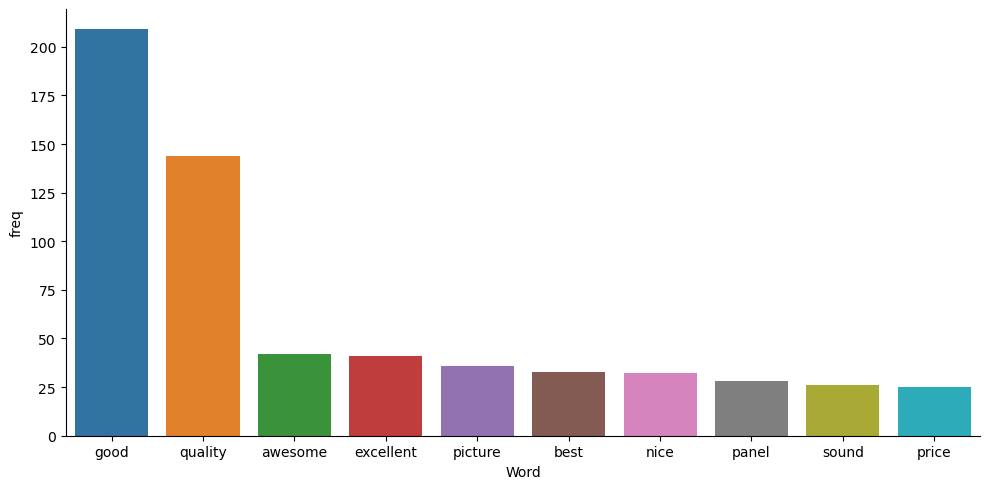

In [28]:
import seaborn as sns
w = tdm1[tdm1['freq'] >=25] 
fg = sns.catplot(x='Word', y='freq',
                        aspect=2,
                        kind='bar', 
                        data=w)

In [29]:
text = " ".join(review for review in df.reviewDescription)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 18275 words in the combination of all review.


### Wordcloud

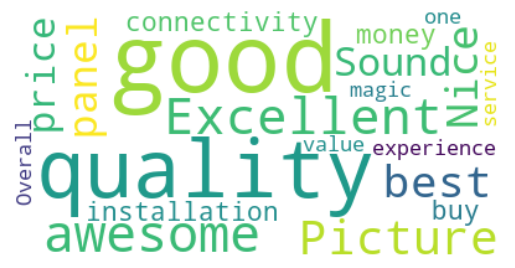

In [30]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)

# Generate a word cloud image
cloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      collocations=False,
                      max_words=20).generate(text)

plt.imshow(cloud, interpolation='bilinear') # IM = IMAGE 
plt.axis("off") 
plt.show()

### Sentiment Analysis

In [31]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity #polarity range -1 to +1
df['polarity'] = df['reviewDescription'].apply(pol)
df.head(5)

,reviewDescription,polarity
0,Very good,0.910000
1,Nice super also one disappoint good,0.544444
2,This excellent Good classic,0.622222
3,Nice,0.600000
4,Dont negative Just give price Superb performan...,0.619643


In [32]:
import numpy as np
df['Sentiment'] = np.where(df['polarity']>= 0, 'Positive', 'Negative')
df.head()

,reviewDescription,polarity,Sentiment
0,Very good,0.910000,Positive
1,Nice super also one disappoint good,0.544444,Positive
2,This excellent Good classic,0.622222,Positive
3,Nice,0.600000,Positive
4,Dont negative Just give price Superb performan...,0.619643,Positive


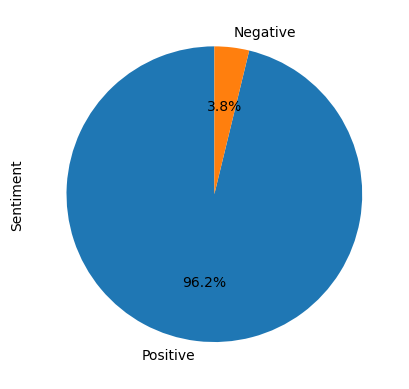

In [33]:
df.Sentiment.value_counts().plot.pie(autopct="%1.1f%%",startangle=90);

# Model Building

In [34]:
df_new = df.drop(['polarity'],axis=1)
df_new.head()

,reviewDescription,Sentiment
0,Very good,Positive
1,Nice super also one disappoint good,Positive
2,This excellent Good classic,Positive
3,Nice,Positive
4,Dont negative Just give price Superb performan...,Positive


In [35]:
df_new.isna().sum()

reviewDescription    0
Sentiment            0
dtype: int64

* No missing values

In [36]:
#data is the original/main dataset
data['sentiment'] = df.Sentiment

In [37]:
data.head(1)

,Unnamed: 0,ProductUrl,productTitle,productPrice,averageRating,reviewTitle,reviewDescription,reviewAuthor,reviewAt,reviewLikes,reviewDislikes,certifiedBuyer,reviewerLocation,scrapedAt,uniqId,sentiment
0,0,https://www.flipkart.com/lg-108-cm-43-inch-ult...,LG 108 cm (43 inch) Ultra HD (4K) LED Smart TV,"₹36,499",4.4,Excellent,Very good product,palakollu komali,6 months ago,0,1,True,Tenali,20/02/2022 02:03:42,4e9df8d3-736c-5dae-b867-b92b7f09fc84,Positive


In [38]:
data.shape

(343, 16)

In [39]:
#adding Y variable which is sentiment
data_dtm['Sentiment']=data.sentiment
data_dtm.head()

,ability,able,absolutely,access,ache,actually,add,additional,additionally,adjustment,...,works,worry,worst,worth,wow,write,writing,year,yes,Sentiment
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive


## Data Partition

In [40]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
X = data_dtm.drop(['Sentiment'],axis=1)
Y = data_dtm['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=231)

## Decision Tree Classifier

In [41]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini',
                                 min_samples_leaf=10, ## child
                                 min_samples_split=20, #parent 
                                 max_depth=4)  #branches)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, min_samples_split=20)

In [42]:
features=cv.get_feature_names_out()

In [43]:
features = features.tolist()  #converting array into list 

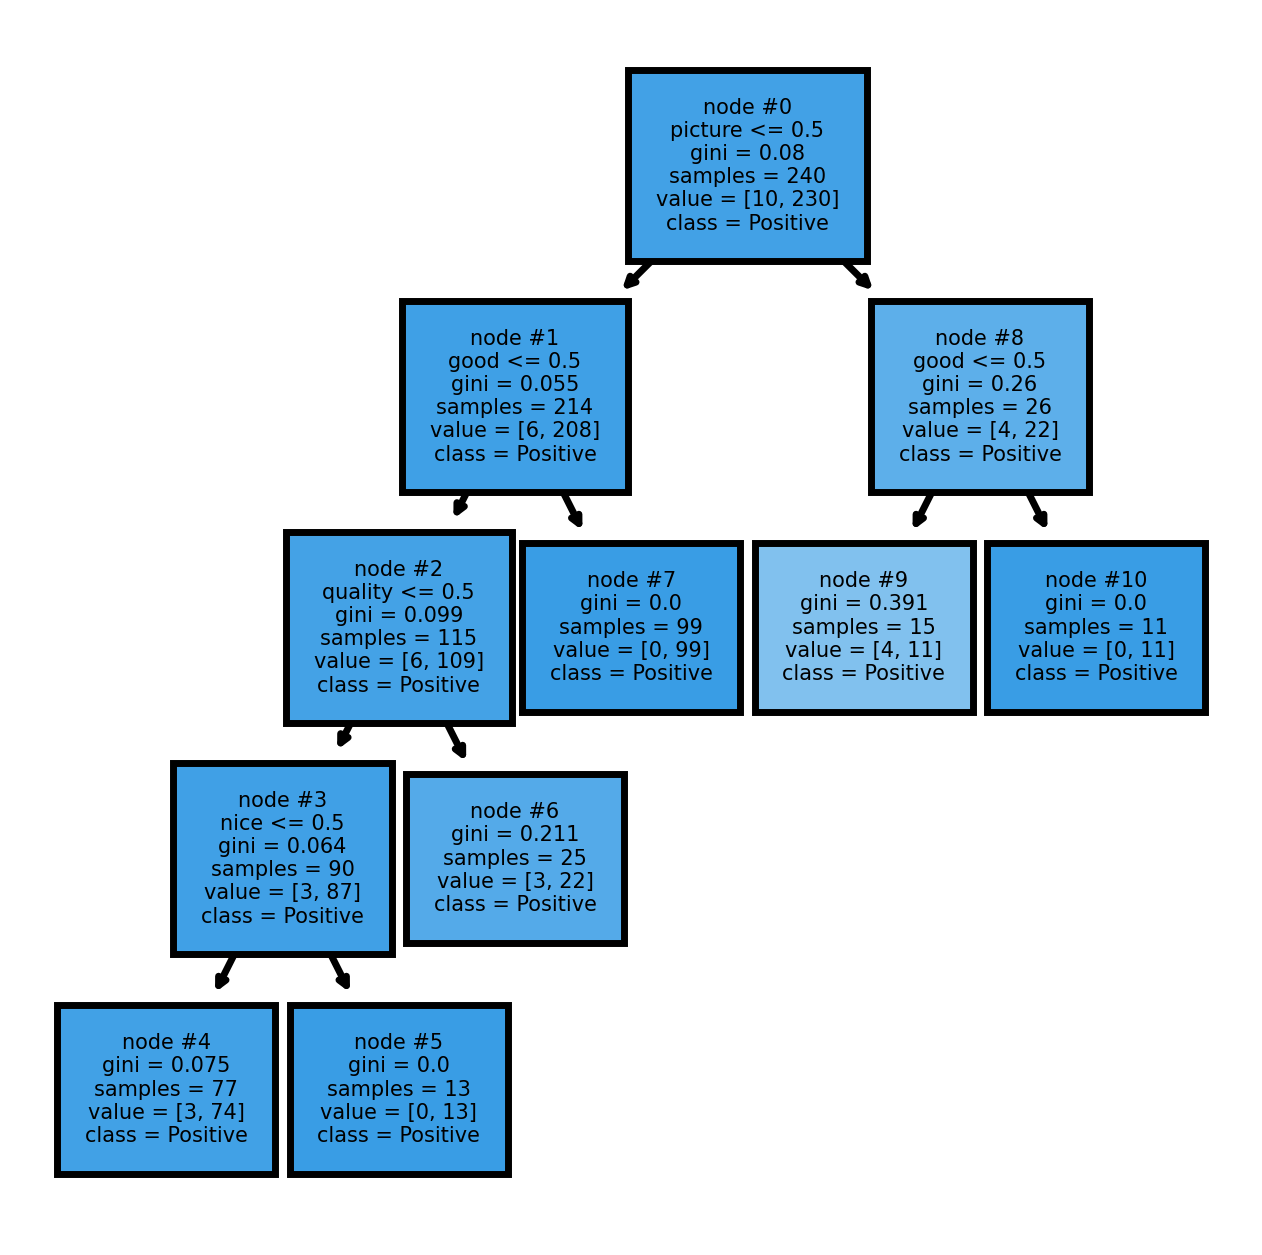

In [44]:
from sklearn import tree
import matplotlib.pyplot as plt
sentiment=['Negative', 'Positive']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=500)
tree.plot_tree(classifier,
               feature_names = features, 
               class_names = sentiment,
               filled = True,
              node_ids=True,
              fontsize=3);

## Prediction on Train data

In [45]:
train = pd.concat([X_train,y_train],axis=1)
train.head()

,ability,able,absolutely,access,ache,actually,add,additional,additionally,adjustment,...,works,worry,worst,worth,wow,write,writing,year,yes,Sentiment
121,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
331,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
48,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
52,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive


In [46]:
train['Predicted'] = classifier.predict(X_train)
train.head()

,ability,able,absolutely,access,ache,actually,add,additional,additionally,adjustment,...,worry,worst,worth,wow,write,writing,year,yes,Sentiment,Predicted
121,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive
331,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive
48,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive
52,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive


## Classification Report of Train:

In [47]:
from sklearn.metrics import classification_report
print(classification_report(train['Predicted'],train['Sentiment']))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         0
    Positive       1.00      0.96      0.98       240

    accuracy                           0.96       240
   macro avg       0.50      0.48      0.49       240
weighted avg       1.00      0.96      0.98       240



## Prediction on Test data

In [48]:
test = pd.concat([X_test,y_test],axis=1)
test.head()

,ability,able,absolutely,access,ache,actually,add,additional,additionally,adjustment,...,works,worry,worst,worth,wow,write,writing,year,yes,Sentiment
139,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
269,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
218,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive


In [49]:
test['Predicted'] = classifier.predict(X_test)
test.head()

,ability,able,absolutely,access,ache,actually,add,additional,additionally,adjustment,...,worry,worst,worth,wow,write,writing,year,yes,Sentiment,Predicted
139,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive
285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive
269,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive
218,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive


## Classification Report of Test:

In [50]:
print(classification_report(test['Predicted'],test['Sentiment']))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         0
    Positive       1.00      0.97      0.99       103

    accuracy                           0.97       103
   macro avg       0.50      0.49      0.49       103
weighted avg       1.00      0.97      0.99       103



# Model Building

## Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
output = logreg.fit(X_train, y_train) # model = output
output

LogisticRegression()

## Prediction on Train Data

In [52]:
train1 = pd.concat([X_train,y_train],axis=1)
train1.head()

,ability,able,absolutely,access,ache,actually,add,additional,additionally,adjustment,...,works,worry,worst,worth,wow,write,writing,year,yes,Sentiment
121,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
331,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
48,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
52,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive


In [53]:
train1['Predicted'] = output.predict(X_train)
train1.head()

,ability,able,absolutely,access,ache,actually,add,additional,additionally,adjustment,...,worry,worst,worth,wow,write,writing,year,yes,Sentiment,Predicted
121,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive
331,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive
48,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive
52,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive


## Classification Report of Train:

In [54]:
print(classification_report(train1['Predicted'],train1['Sentiment']))

              precision    recall  f1-score   support

    Negative       0.60      1.00      0.75         6
    Positive       1.00      0.98      0.99       234

    accuracy                           0.98       240
   macro avg       0.80      0.99      0.87       240
weighted avg       0.99      0.98      0.99       240



## Prediction on Test Data

In [55]:
test1 = pd.concat([X_test,y_test],axis=1)
test1.head()

,ability,able,absolutely,access,ache,actually,add,additional,additionally,adjustment,...,works,worry,worst,worth,wow,write,writing,year,yes,Sentiment
139,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
269,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
218,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive


In [56]:
test1['Predicted'] = output.predict(X_test) 
test1.head()

,ability,able,absolutely,access,ache,actually,add,additional,additionally,adjustment,...,worry,worst,worth,wow,write,writing,year,yes,Sentiment,Predicted
139,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive
285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive
269,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive
218,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive


## Classification Report of Test:

In [57]:
print(classification_report(test1['Predicted'],test1['Sentiment']))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         0
    Positive       1.00      0.97      0.99       103

    accuracy                           0.97       103
   macro avg       0.50      0.49      0.49       103
weighted avg       1.00      0.97      0.99       103



Conclusion 

1) Decision Tree:

    * Train : 96%
    * Test : 97%


2) Logistic Regression:

    * Train : 98%
    * Test : 97%

In [58]:
# import os
# os.chdir(r"D:\PROJECTS\NLP Sentiment analysis(Flipcart)")

In [59]:
# import pickle
# pickle.dump(output, open(r"D:\PROJECTS\NLP Sentiment analysis(Flipcart)\Cloud Deployment\build1.pkl",'wb'))  
# # Exporting model from python to laptop

# END